In [25]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from numpy.random import default_rng

import itertools

RNG = default_rng()

# [Voronoi Diagrams](https://en.wikipedia.org/wiki/Voronoi_diagram#Applications)
## What is a Voronoi Diagram?

A Voronoi diagram is a partitioning of a metric space based on a set of points. Informally, we "cut" our metric space into regions based on which point they are closest to. Let $(F_i)_{i \in I}$ be our set of points over some index $I$ and let our metric space be $\mathbb{R}^2$ with the Euclidean metric $d$. Then each Voronoi region (sometimes called a Voronoi cell) $R_i$ is the set of points closest to $F_i$ for some $i \in I$:
$$R_i = \{P \in \mathbb{R}^2: d(P, F_i) \leq d(P, F_j) \text{ for any $j = 1, \ldots, n$}\}.$$

If this is not already clear, pictures later in the notebook will be illuminating.

[TODO put a picture from code here]

## Why care?

If you're not a pure mathematician, you may ask yourself _why should I care_? Triangulation is useful in many fields ranging from archeology, art history, to meteorology. [TODO]

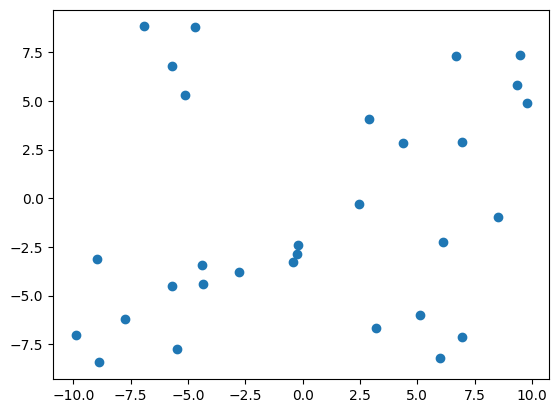

In [26]:
bounds = (-10, 10)
dim = 2
num_points = 30
points = RNG.uniform(*bounds, size=(30, dim))
plt.scatter(points[:, 0], points[:, 1])

In [27]:
# TODO: read https://towardsdatascience.com/matplotlib-animations-in-jupyter-notebook-4422e4f0e389

# [Fortune's Algorithm](https://en.wikipedia.org/wiki/Fortune%27s_algorithm)

## Overview

Fortune's algorithm uses a "sweep line" to compute the boundary of Voronoi regions. We sweep a vertical line $\ell$ across $\mathbb{R}^2$ and draw parabolas $B_i$ focused at points left of $\ell$ using $\ell$ as the directrix. The "beach line" $\mathscr{B}$ is the union of these parabolas containing only their rightmost points at any given $y$-value. The edges of the Voronoi regions are formed by points in the intersection of any two parabolas and on the beach line.


<center><img src="Fortunes-algorithm-slowed.gif"/></center>


<center><i>Graphic from Wikipedia. The sweep line is red. The beach lines are in black</i></center>

## Correctness

First, let's add some more rigour to the definitions introduced above. At any given moment while running the algorithm, $\ell$ is the vertical line at $x$ for some fixed $x \in \mathbb{R}$. Let $\mathcal{F}$ be the set of points to the left of $\ell$, i.e., $\mathcal{F} = \{F_i : F_i.x \leq x\}$ where the notation $F_i.x$ just means the $x$-coordinate of $F_i$. Next, recall that a parabola can be defined as the locus of points equidistant to a focus and a directrix, so since $B_i$ is the parabola with focus $F_i$ and directrix $\ell$, we define it like

$$B_i = \{ P \in \mathbb{R}^2 : d(P, F_i) = d(P, \ell) \}$$

where $d(P, \ell)$ means the distance between $P$ and the point in $\ell$ closest to $P$. Let $\mathcal{B}$ be the set of $B_i$'s. Finally, we can define the beach line formally

$$\mathscr{B} = \bigcup_{y \in \mathbb{R}} \left\{ B_i \in \mathcal{B}: B_i.x \geq B_j.x \text{ for } B_j \in \left\{B_j \in \mathcal{B}: B_j.y = y \right\} \right\}.$$

This clunky notation just means that $\mathscr{B}$ is the union of all parabolas $B_i$ with the caveat that we only take points closest to $\ell$ at every given $y$-value.

### Proof

We claim that for any fixed $\ell$ that any distinct $B_1, B_2 \in \mathcal{B}$ that $B_1 \cap B_2 \cap \mathscr{B} \subseteq R_1 \cap R_2$. In other words, the intersection of parabolas on the beach line is always a subset of boundary of the Voronoi regions. To see this, pick any $P \in B_1 \cap B_2 \cap \mathscr{B}$. Since $P \in B_1 \cap B_2$ we have $d(P, F_1) = d(P, F_2)$ so either $P \in R_1 \cap R_2$ or $P \not\in R_1 \cap R_2$. If the first case is true, then we're done. The second case is impossible via rather ugly algebra. For example, if $F_1 = (h_1, k_1)$ and $F_2 = (h_2, k_2)$ then the formula for the $x$-coordinate of the relevant intersection $P$ (assuming WLOG that $h_1 < h_2$) using a horizontal directrix $y = D$ is:
$$
\frac{\left(k_{1}-D\right)2h_{2}-\left(k_{2}-D\right)2h_{1}-\sqrt{\left(\left(k_{2}-D\right)2h_{1}-\left(k_{1}-D\right)2h_{2}\right)^{2}-4\left(k_{1}-k_{2}\right)\left(\left(k_{1}-D\right)h_{2}^{2}-\left(k_{2}-D\right)h_{1}^{2}-\left(k_{1}-k_{2}\right)\left(k_{1}-D\right)\left(k_{2}-D\right)\right)}}{2\left(k_{1}-k_{2}\right)}.
$$
For clarity, I have opted to instead create a [Desmos graph](https://www.desmos.com/calculator/qj8nsnej4w). It's interactive, so try moving around $F_3$ to see if you can make sure that it's both closer to $P$ than either $F_1$ or $F_2$ while not passing below $P$ (since $P$ must be on the beach line). Notice that we can only put $P$ on the beach line if the purple parabola.



In [28]:
from IPython.display import IFrame
IFrame('https://www.desmos.com/calculator/vi25oacgnk?embed', width=700, height=350)